<a href="https://colab.research.google.com/github/juliakispert/EmotionDetectionCapstone/blob/main/EmotionDetectionCapstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyDrive

import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import random 

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

download = drive.CreateFile({'id': '1Jr_gzqh_QiltOqufHiEqsXIzC6sRYbGt'}) # id in share link

download.GetContentFile('fairface-img-margin025-trainval.zip')
!unzip fairface-img-margin025-trainval.zip

Streaming output truncated to the last 5000 lines.
  inflating: val/5370.jpg            
  inflating: val/5596.jpg            
  inflating: val/5875.jpg            
  inflating: val/5878.jpg            
  inflating: val/5879.jpg            
  inflating: val/5883.jpg            
  inflating: val/6126.jpg            
  inflating: val/6132.jpg            
  inflating: val/6144.jpg            
  inflating: val/6150.jpg            
  inflating: val/6340.jpg            
  inflating: val/7190.jpg            
  inflating: val/7734.jpg            
  inflating: val/7747.jpg            
  inflating: val/7872.jpg            
  inflating: val/7940.jpg            
  inflating: val/8065.jpg            
  inflating: val/8069.jpg            
  inflating: val/8125.jpg            
  inflating: val/8202.jpg            
  inflating: val/8204.jpg            
  inflating: val/8205.jpg            
  inflating: val/8268.jpg            
  inflating: val/8270.jpg            
  inflating: val/8281.jpg            

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow.keras.utils as tfk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

#for reproductability 
seed1=1414
tf.random.set_seed(seed1)
np.random.seed(seed1)
random.seed(seed1)

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical

#downloading tagged data
download = drive.CreateFile({'id': '1EOFbzdbkusUFOd9k2rcPi9bzXpnD-_6c'})
download.GetContentFile('fairface_label_train Adding happiness tag - fairface_label_train.csv')

train = pd.read_csv('fairface_label_train Adding happiness tag - fairface_label_train.csv')

In [ ]:
#training 
train_image = []
for i in tqdm(range(train.shape[0])):
    img = tfk.load_img(train['path'][i], target_size=(28,28,1), grayscale=False)
    img = tfk.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 86744/86744 [01:33<00:00, 927.90it/s]


In [ ]:
y=train['emotion'].values
y = to_categorical(y)

In [ ]:
imgHeight = 28
imgWidth = 28
numClasses = 2
classNames = ['Happy', 'Not_Happy']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.12 )

In [ ]:
#creating model 
model = keras.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(imgHeight, imgWidth, 3))) # 1 layer
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(.15))
model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(imgHeight, imgWidth, 3))) # 2 layer
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(.15))
model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(imgHeight, imgWidth, 3))) # 3 layer 
model.add(layers.Dropout(.3))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(numClasses, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=40 , validation_data=(X_test, y_test))

Epoch 1/40
2386/2386 [==============================] - 19s 5ms/step - loss: 0.4859 - accuracy: 0.7726 - val_loss: 0.3910 - val_accuracy: 0.8282
Epoch 2/40
2386/2386 [==============================] - 12s 5ms/step - loss: 0.4161 - accuracy: 0.8174 - val_loss: 0.3691 - val_accuracy: 0.8428
Epoch 3/40
2386/2386 [==============================] - 11s 5ms/step - loss: 0.4036 - accuracy: 0.8252 - val_loss: 0.3658 - val_accuracy: 0.8426
Epoch 4/40
2386/2386 [==============================] - 11s 5ms/step - loss: 0.3956 - accuracy: 0.8276 - val_loss: 0.3593 - val_accuracy: 0.8451
Epoch 5/40
2386/2386 [==============================] - 11s 4ms/step - loss: 0.3880 - accuracy: 0.8319 - val_loss: 0.3589 - val_accuracy: 0.8468
Epoch 6/40
2386/2386 [==============================] - 11s 5ms/step - loss: 0.3834 - accuracy: 0.8353 - val_loss: 0.3567 - val_accuracy: 0.8513
Epoch 7/40
2386/2386 [==============================] - 11s 5ms/step - loss: 0.3803 - accuracy: 0.8353 - val_loss: 0.3553 - val_ac

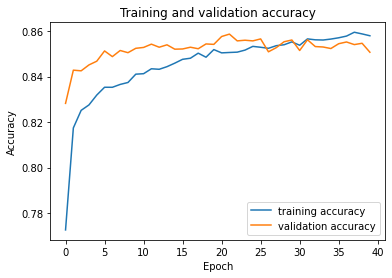

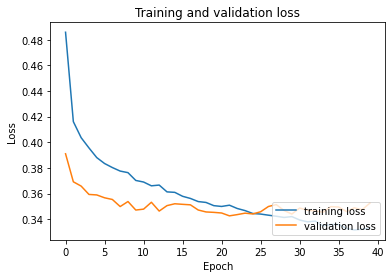

In [ ]:
# Show history, how training went and accuracy
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')

plt.show()

# plot training and validation loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.title('Training and validation loss')

plt.show()

In [ ]:
download = drive.CreateFile({'id': '1AKLd-OKNv02AIFWqG-zHLTWGloaNhsgC'})
download.GetContentFile('fairface_test - fairface_label_val.csv')

test = pd.read_csv('fairface_test - fairface_label_val.csv')

In [ ]:
# check testing images 
test_image = []
for i in tqdm(range(test.shape[0])):
    t_img = tfk.load_img(test['path'][i], target_size=(28,28,1), grayscale=False)
    t_img = tfk.img_to_array(t_img)
    t_img = t_img/255
    test_image.append(t_img)
test = np.array(test_image)

100%|██████████| 10954/10954 [00:09<00:00, 1125.98it/s]


In [ ]:
# making predictions
pred = np.argmax(model.predict(test), axis=-1)

343/343 [==============================] - 1s 2ms/step


In [ ]:
download = drive.CreateFile({'id': '1colVGpnlPOTUAA5wXRhmUM7Em16EWBku'})
download.GetContentFile('fairface_testLabeled - fairface_label_val.csv') 

testLabeled = pd.read_csv('fairface_testLabeled - fairface_label_val.csv') 

In [ ]:
# count accuracy of test images
acc_count = 0
for i in range(len(pred)):
  if testLabeled['emotion'][i] == pred[i]:
    acc_count += 1

prob = acc_count/len(pred)
prob

0.8527478546649626

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.imagenet_utils import decode_predictions

def predict_image(paths):
  """function that takes in a list of image paths and loads the image then uses the model to predict whether the 
  subject in the image is happy or not"""
  images = []
  for i in range(len(paths)):
    img = tfk.load_img(paths[i], target_size=(28,28,1), grayscale=False)
    img = tfk.img_to_array(img)
    img = img/255
    images.append(img)
  img_test = np.array(images)
  pred = np.argmax(model.predict(img_test), axis=-1)
  return pred

res = predict_image(['val/100.jpg'])
print(res)

1/1 [==============================] - 0s 70ms/step
[0]


In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))


In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# taking a live photo 
from tensorflow.python.framework.importer import import_graph_def_for_function
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Click to Evaluate Happiness';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
  faces = faceCascade.detectMultiScale(
      gray,
      scaleFactor=1.3,
      minNeighbors=3,
      minSize=(30, 30)
  )

  print("[INFO] Found {0} Faces.".format(len(faces)))

  thislist=[] 
  for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
      roi_color = img[y:y + h, x:x + w]
      print("[INFO] Object found. Saving locally.")
      filename=str(w) + str(h) + '_faces.jpg'
      cv2.imwrite(filename, roi_color)
      thislist.append(filename)


  return thislist

<IPython.core.display.Javascript object>

[INFO] Found 2 Faces.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.


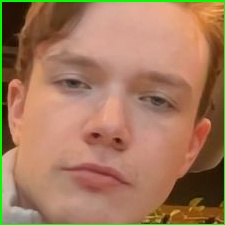

1/1 [==============================] - 0s 18ms/step
not happy


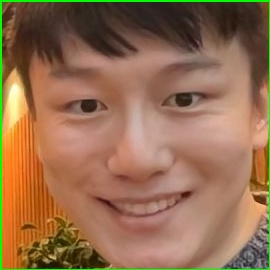

1/1 [==============================] - 0s 17ms/step
happy


In [ ]:
#taking photo to check if someone is happy or not 
try:
  faces = take_photo('photo.jpg')
  for x in faces:
    display(Image(x))
    if predict_image([x]) == 1:
      print("happy")
    else:
      print("not happy")
  
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))